BRAIN TUMAR CLASSIFICATION

In [2]:
import numpy as np 
import pandas as pd
import os

In [17]:
tf.float32=np.float32

In [3]:
pip install tensorflow-gpu keras

  Using cached tensorflow_gpu-2.10.0-cp38-cp38-win_amd64.whl (455.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [20]:
gen = ImageDataGenerator(rescale=1./255,validation_split = 0.2,zoom_range=(0.99,0.99),dtype=tf.float32)

In [21]:
train = gen.flow_from_directory(r"C:\Users\Hp\OneDrive\Desktop\ML2",
                               target_size = (150,150),
                               batch_size = 256,
                               class_mode = "binary",
                               color_mode = "rgb",
                               shuffle = True,
                               seed = 123,
                               subset = "training")

Found 5619 images belonging to 2 classes.


In [22]:
val = gen.flow_from_directory(r"C:\Users\Hp\OneDrive\Desktop\ML2",
                               target_size = (150,150),
                               batch_size = 8,
                               class_mode = "binary",
                               color_mode = "rgb",
                               shuffle = True,
                               seed = 123,
                               subset = "validation")
classes = val.class_indices



Found 1404 images belonging to 2 classes.


With grayscale as color mode we get high spikes in validation loss in training and substantially lower accuracy compared with a dataset with rgb color mode

In [23]:
classes

{'Testing': 0, 'Training': 1}

In [24]:
import seaborn as sns

class disturbution in the brain tumor dataset

<AxesSubplot:>

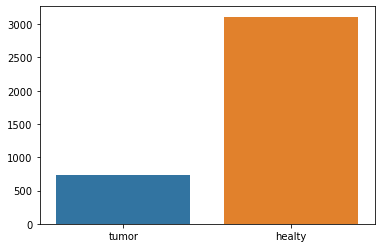

In [25]:
t=0
h=0
for i in range(15):
    a, b = next(train)
    for j in b:
        if j == 1:
            h+=1
        else:
            t+=1

sns.barplot(x=['tumor','healty'],y=[t,h])

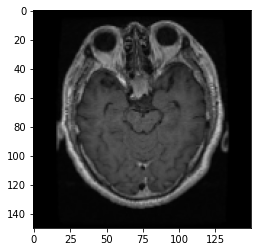

In [26]:
import matplotlib.pyplot as plt
batch = next(train)

plt.imshow(batch[0][0])

building the CNN model

In [27]:
from keras.layers import Conv2D, MaxPool2D, LeakyReLU, BatchNormalization, Dropout, Dense, InputLayer, Flatten
from keras.losses import BinaryCrossentropy
from keras.optimizers import Adam

In [28]:
model = keras.Sequential()
model.add(InputLayer(input_shape=(150,150,3)))
model.add(Conv2D(filters=32,kernel_size=3, activation="relu", padding="same"))
model.add(MaxPool2D())
model.add(Conv2D(filters=64,kernel_size=3, activation="relu", padding="same"))
model.add(MaxPool2D())


model.add(Flatten()) #


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(1, activation="sigmoid"))


model.compile(optimizer=Adam(0.001),loss = BinaryCrossentropy(),metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 128)              

In [30]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [32]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True,
    show_layer_names=True,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [33]:
from keras import utils, callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_loss", mode="min", 
                                        patience=5, restore_best_weights = True)

In [34]:
history = model.fit(train,verbose=1,callbacks = [earlystopping],epochs=10,validation_data=(val))

Epoch 1/10
22/22 [==============================] - 215s 10s/step - loss: 0.7882 - accuracy: 0.5181 - val_loss: 0.5872 - val_accuracy: 0.7942
Epoch 2/10
22/22 [==============================] - 180s 8s/step - loss: 0.6860 - accuracy: 0.6035 - val_loss: 0.7062 - val_accuracy: 0.4558
Epoch 3/10
22/22 [==============================] - 192s 9s/step - loss: 0.6320 - accuracy: 0.6555 - val_loss: 0.5051 - val_accuracy: 0.8134
Epoch 4/10
22/22 [==============================] - 201s 9s/step - loss: 0.6004 - accuracy: 0.6900 - val_loss: 0.5069 - val_accuracy: 0.8134
Epoch 5/10
22/22 [==============================] - 214s 10s/step - loss: 0.5571 - accuracy: 0.7400 - val_loss: 0.4907 - val_accuracy: 0.8134
Epoch 6/10
22/22 [==============================] - 186s 8s/step - loss: 0.5279 - accuracy: 0.7580 - val_loss: 0.4919 - val_accuracy: 0.8134
Epoch 7/10
22/22 [==============================] - 165s 7s/step - loss: 0.4974 - accuracy: 0.7804 - val_loss: 0.4899 - val_accuracy: 0.8134
Epoch 8/10


the accuracy recevied from the model is 80.17% 

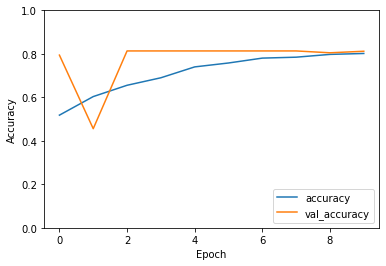

In [35]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

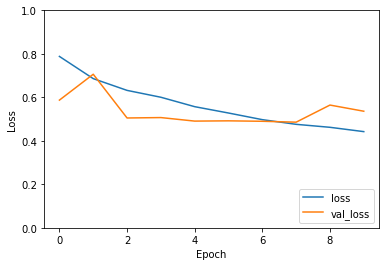

In [36]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')

bulting the UI

- show the result of the image by marking or high lighting the position

- result generated by the model is displayed in ui

- use either yolo model or CNN model only

- https://www.researchgate.net/publication/348176421_A_Computer-Aided_Diagnosis_of_Brain_Tumors_Using_a_Fine-Tuned_YOLO-based_Model_with_Transfer_Learning

crerating the UI

In [1]:
pip install Flask --user

In [1]:
from flask import Flask

testing flask 

In [ ]:
from flask import Flask
app = Flask(__name__)

@app.route('/')
def hello_world():
    return ('Hello World')

if __name__ == '__main__':
   app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


the classified output should be iplemented in flask

one of the example of medical image processing is mri classification